In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

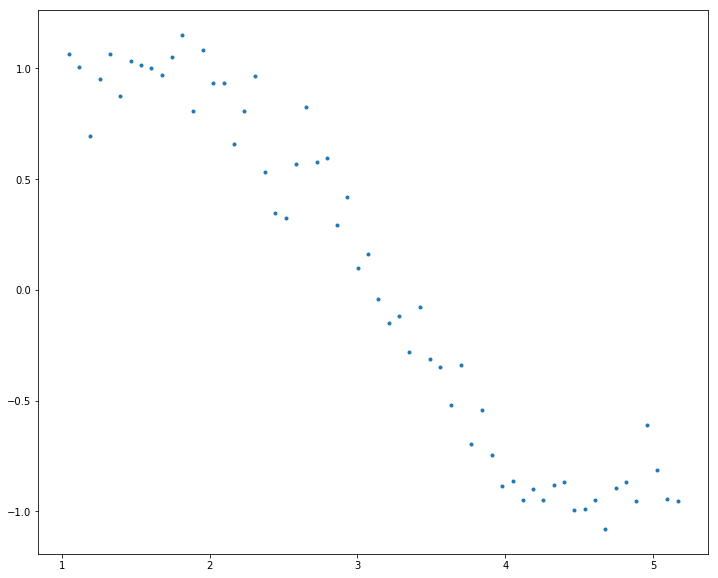

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
# Import Linear regression from scikit-learn
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    # Initialise predictors
    predictors = ['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])
        
    # Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend([linreg.coef_])
    return ret

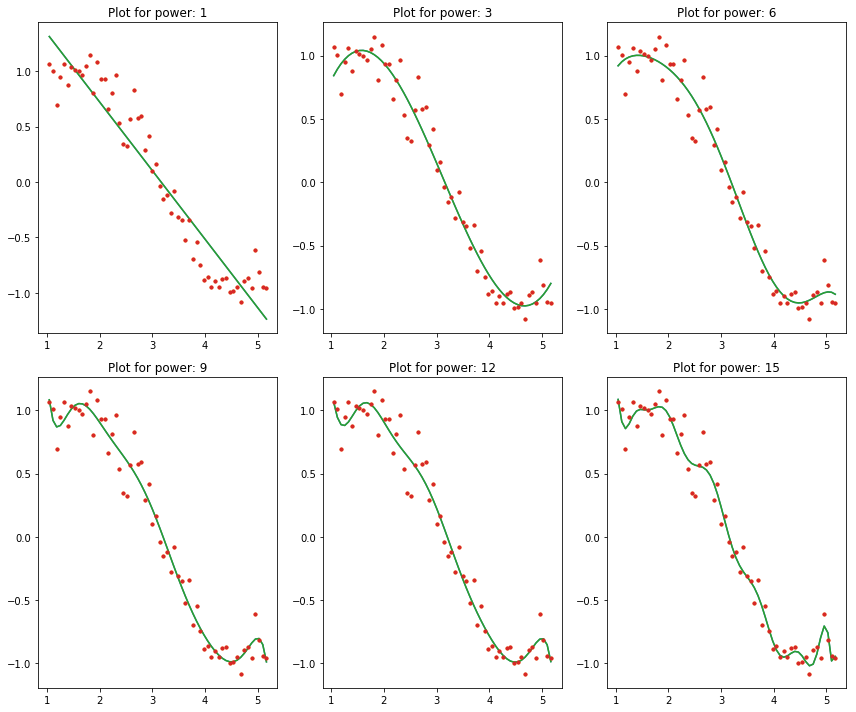

In [5]:
# Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
coef_matrix_simple = coef_matrix_simple

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:2] = linear_regression(data, power=i, models_to_plot=models_to_plot)[0:2]
    coef_matrix_simple.iloc[i-1, 2:i+2] = np.array(linear_regression(data, power=i, models_to_plot=models_to_plot)[2:])
    #print(linear_regression(data, power=i, models_to_plot=models_to_plot))

In [6]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.28032,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.27668,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.10335,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.07858,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.01857,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.990074,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.928265,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91761,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.874941,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.874578,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN
